In [9]:
import pandas as pd
df = pd.read_csv('academic Stress level.csv')
df.head()


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


## Mengecek tipe data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

## **1. Data Cleaning**

disini kita mengecek value yang hilang ternyata ada value yang hilang yaitu Study Environment hanya satu



In [4]:
df.isnull().sum()

,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,1
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


Disini Kita ganti data yang hilang menggunakan nilai default yang pada kolom  Study Environment maka nilai yang hilang bisa kita menggunakan "Unknown" sebagai nilai default.

In [5]:
df['Study Environment'].fillna('Unknown', inplace=True)
df.isnull().sum()


/tmp/ipython-input-729975408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Environment'].fillna('Unknown', inplace=True)


,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,0
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


Disini kita kan mengecek data duplikat ternyata pada dataset ini tidak memiliki data duplikat sehingga data ini aman

In [6]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


In [16]:
df.columns.tolist()


['Timestamp',
 'Your Academic Stage',
 'Peer pressure',
 'Academic pressure from your home',
 'Study Environment',
 'What coping strategy you use as a student?',
 'Do you have any bad habits like smoking, drinking on a daily basis?',
 'What would you rate the academic  competition in your student life',
 'Rate your academic stress index ']

Pada gambar visualisasi boxplot untuk pengecekan outlier ditemukan beberapa titik yang tampak sebagai outlier pada kolom
What would you rate the academic  competition in your student life dan Rate your academic stress index .

Namun di https://www.kaggle.com/datasets/ayeshaimran123/academic-stress-level-maintenance-dataset
nilai tersebut masih berada dalam rentang skala Likert (1–5),
sehingga saya megganggap data tersebut valid dan tidak dilakukan penghapusan.

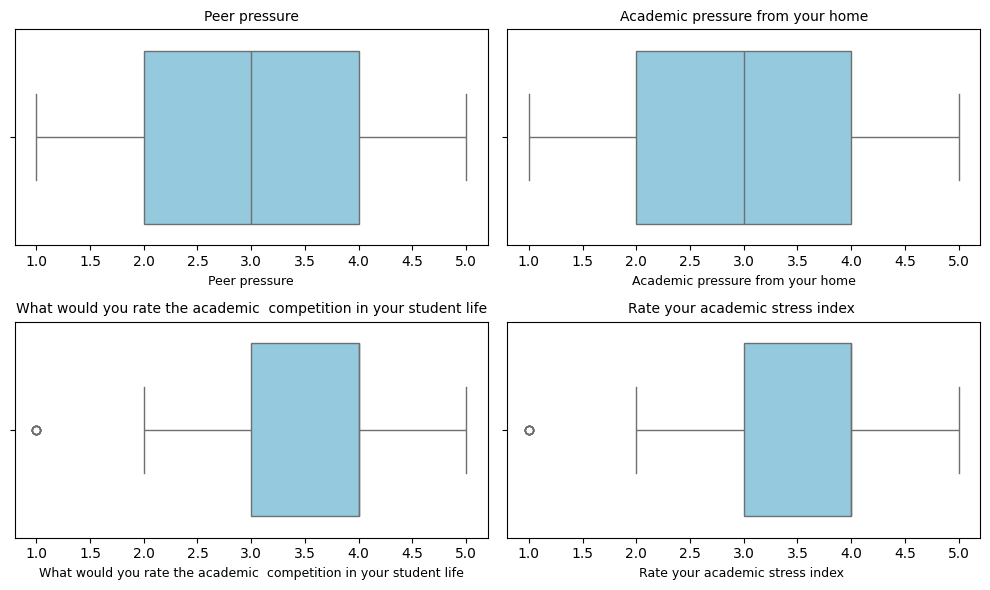

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih 4 kolom numerik dari dataset
numeric_cols = [
    'Peer pressure',
    'Academic pressure from your home',
    'What would you rate the academic  competition in your student life',
    'Rate your academic stress index '
]


fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

# Loop untuk membuat boxplot per kolom
for i, data_nm in enumerate(numeric_cols):
    sns.boxplot(x=df[data_nm], color='skyblue', ax=axes[i])
    axes[i].set_title(f'{data_nm}', fontsize=10)
    axes[i].set_xlabel(data_nm, fontsize=9)


plt.tight_layout()
plt.show()


## **2. Normalisasi/standarisasi kolom numerik**

Disini saya menggunakan Standarisasi yang dimana data memiliki rata-rata 0 dan standar deviasi 1.

Terlihat data Nilai negatif menunjukkan data di bawah rata-rata, sedangkan nilai positif menunjukkan data di atas rata-rata.  

In [23]:
from sklearn.preprocessing import StandardScaler

# pilih kolom numerik
num_cols = ['Peer pressure',
            'Academic pressure from your home',
            'What would you rate the academic  competition in your student life',
            'Rate your academic stress index ']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()


,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
0,0.859815,1.431884,-0.480991,1.242966
1,-0.066140,0.645752,-0.480991,-0.701338
2,-1.918050,-1.712646,-1.456915,0.270814
3,-0.066140,-0.926513,0.494933,-0.701338
4,-0.066140,-0.140381,0.494933,1.242966


##3. Encoding kolom kategorikal

Disini saya Encoding menggunakan adalah Ordinal Encoding, di mana setiap kategori diberi nilai angka (0, 1, 2,) sesuai urutannya dalam data.

pada data data_kolom itu terdapat empat kolom kategorikal yang dimana masing-masing data memiliki 3 kategori makanya saya langsung dikonversi menggunakan OrdinalEncoder tanpa perlu membuat banyak kolom baru.

kalau mau liat data kategorikalnya bisa disini https://www.kaggle.com/datasets/ayeshaimran123/academic-stress-level-maintenance-dataset


In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# kolom kategorikal
data_kolom = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

# lakukan encoding
df[data_kolom] = encoder.fit_transform(df[data_kolom])
df[data_kolom].head()


,Your Academic Stage,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?"
0,2.0,0.0,0.0,0.0
1,2.0,1.0,0.0,0.0
2,2.0,1.0,2.0,0.0
3,2.0,1.0,0.0,0.0
4,2.0,1.0,0.0,0.0


## **4. Feature Engineering**

Pada tahap ini, dibuat fitur baru bernama Total_Pressure, yang merupakan hasil penjumlahan antara:
- Peer pressure
- Academic pressure from your home
- What would you rate the academic  competition in your student life

Tujuannya adalah untuk merepresentasikan tingkat tekanan akademik secara keseluruhan.

In [29]:
# Membuat Total_Pressure
df['Total_Pressure'] = (
    df['Peer pressure'] +
    df['Academic pressure from your home'] +
    df['What would you rate the academic  competition in your student life']
)

df[['Peer pressure','Academic pressure from your home',
    'What would you rate the academic  competition in your student life','Total_Pressure']].head()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Total_Pressure
0,0.859815,1.431884,-0.480991,1.810708
1,-0.066140,0.645752,-0.480991,0.098621
2,-1.918050,-1.712646,-1.456915,-5.087610
3,-0.066140,-0.926513,0.494933,-0.497720
4,-0.066140,-0.140381,0.494933,0.288412


# **5. Splitting data ke dalam data training & data testing**
Tahap ini dilakukan untuk membagi dataset menjadi dua bagian:
*  **Data Training (70%)**  digunakan untuk melatih model.
*  **Data Testing (30%)** digunakan untuk menguji performa model.

Target yang dipredeksi pada dataset ini adalah kolom: Rate your academic stress index, Sedangkan kolom lainnya digunakan sebagai fitur input.


In [31]:
from sklearn.model_selection import train_test_split

# Subset feature dan target
X = df.iloc[:, :-1]  # Feature (semua kolom kecuali kolom terakhir)
y = df.iloc[:, -1]   # Target (kolom terakhir)


# Membagi data menjadi training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

Ukuran data training: (112, 9)
Ukuran data testing: (28, 9)
Dimensi y train:  (112,)
Dimensi y test:  (28,)
